<!-- JPN -->
# ニューラルネットワーク (Neural network)

※本演習資料の二次配布・再配布はお断り致します。

<!-- ENG -->
# Neural network

※Distribution or redistribution of these exercise materials without the copyright holder's permission is not permitted.

<!-- JPN -->
　今回から、PyTorchを用いたニューラルネットワーク (Neural network) を用いた分類問題を学んでいく。本日の内容は以下の通りである。

- **1 | 勾配降下法のおさらい**
- **2 | PyTorchに向けたデータセットの準備**
- **3 | `torch.nn.Linear()`を利用した単層パーセプトロンの実装**
- **4 | `torch.tensor`を利用した単層パーセプトロン (Single layer perceptron) の実装**

<!-- ENG -->
　We will learn classification problems using neural networks with PyTorch. Today's contents are as follows.

- **1 | Reviewing the steepest gradient descent**
- **2 | Preparing a data set for PyTorch**
- **3 | Implementing a single layer perceptron using `torch.nn.Linear()`.**
- **4 | Implementing of a single layer perceptron using `torch.tensor`**


<!-- JPN -->
## 1 | 勾配降下法のおさらい

　ロジスティック回帰の内部実装で「勾配降下法 (steepest gradient descent)」に基づいて重みを最適化したことを覚えているだろうか。
**勾配降下法はニューラルネットワークでも極めて重要**であるため、まずは勾配降下法のおさらいをしてみる。

<!-- ENG -->
## 1 | Reviewing the steepest gradient descent

　Do you remember when we optimized the weights based on the steepest gradient descent in the internal implementation of logistic regression?
Since **the steepest gradient descent is also extremely important in neural networks**, we will first review steepest gradient descent.

--------

<!-- JPN -->
##### 課題 1

　勾配降下法は以下の式で重み $w$ を更新していくものだった。

<!-- ENG -->
##### Exercise 1
　Steepest gradient descent uses the following equation to update the weights $w$.

$$ \boldsymbol{w}^{(t+1)} = \boldsymbol{w}^{(t)} - \eta \left.\frac{\partial J(\boldsymbol{w})}{\partial \boldsymbol{w}}\right|_{\boldsymbol{w}=\boldsymbol{w}^{(t)}}$$


<!-- JPN -->
　$w$ は1次元で $J(w) = w^2 + 2w$ であるとき、以下のコードを埋めて勾配降下法の関数 `optimize()` を完成させよ。（ $w=-1$ に収束することを確認することで実装が正しいか推定すると良い）

<!-- ENG -->
　When $w$ is one dimensional and $J(w) = w^2 + 2w$, complete the steepest gradient descent `optimize()` by filling ellipses in the following code. (It is good to estimate whether the implementation is correct by confirming that it converges to $w=-1$)

In [1]:
# CODE CELL FOR YOUR ANSWER

# Function to calculate gradient
# Differentiate dJ(w)/dw and implement gradient() according to the result.
def gradient(w):
    return 2 * w + 2

def optimize(w_initial, eta=0.1, steps=100):
    w_now = w_initial
    for i in range(steps):
        gradient_at_w = gradient(w_now)
        w_now = w_now - eta * gradient_at_w

    return w_now

print(optimize(1))

-0.9999999995925928


--------------

<!-- JPN -->
## 2 | PyTorchに向けたデータセットの準備

<!-- ENG -->
## 2 | Preparing a data set for PyTorch

<!-- JPN -->
### 2.1 | PyTorchの準備

　この演習においては、ニューラルネットワークを構築するためのPythonライブラリとして、PyTorchを利用する（**補足資料 ※1**）。ニューラルネットワークのライブラリはバージョンが頻繁に更新されるため、再現性の担保のためにも常にバージョンを確認しておくと良い。


<!-- ENG -->
### 2.1 | Preparing PyTorch

　In this exercise, we will use PyTorch as a Python library for building neural networks (**Supplementary Material S1**). Since neural network library versions are frequently updated, it is always a good idea to check the version to ensure reproducibility.


In [2]:
# In Google Colab, PyTorch is installed from the beginning.
import torch

In [3]:
# Check the library version
print(torch.__version__)

2.1.0+cu121


<!-- JPN -->
### 2.2 | データセットの作成

<!-- ENG -->
### 2.2 | Creating a data set

<!-- JPN -->
　ここでは、仮想的なデータセットを作成して、これを題材にニューラルネットワークを学んでいくことにする。

<!-- ENG -->
　Here, we will create a virtual data set, and use this as a subject to learn about neural networks.

In [4]:
# import packages
import numpy as np
import matplotlib.pyplot as plt

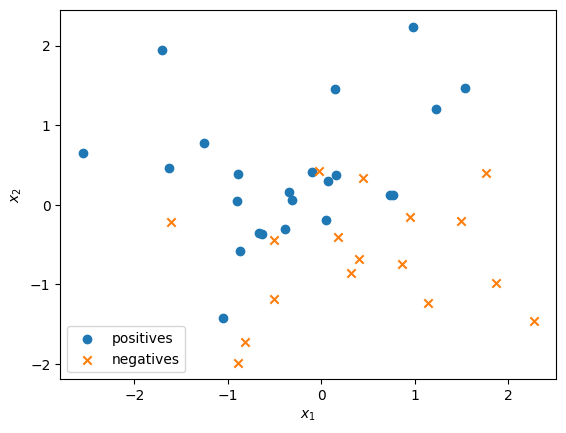

In [5]:
# Create virtual training data
np.random.seed(0)
n = 40
X_train = np.random.randn(n, 2)

noise = 1.6 * np.random.randn(n)                        # The result(s) contains noise
y_train = - X_train[:,0] + 2 * X_train[:,1] + noise > 0 # -x1 + 2 x2 > 0 is defined as positive

# Show a scatter plot of the observed data
plt.scatter(X_train[:,0][y_train==True],X_train[:,1][y_train==True],
            marker="o", label="positives")           # Show positive (y = True) for o
plt.scatter(X_train[:,0][y_train==False],X_train[:,1][y_train==False],
            marker="x", label="negatives")           # Show negative (y = False) for x
plt.xlabel('$x_1$')
plt.ylabel('$x_2$')
plt.legend(loc="lower left")
plt.show()

<!-- JPN -->
### 2.3 | PyTorch用のデータセットの準備

　PyTorchでは、学習に用いる入力 $X$ および出力 $y$ について、以下の条件を満たす必要がある。

* 入力・出力はいずれもPyTorchのデータ形式である `torch.tensor` で表現されている
* 入力・出力は**いずれも 行列**である

特に、**出力 $y$ の形式はscikit-learnと異なって行列**である必要があることに注意しよう。この条件を満たすように、作成したデータ `X_train` および `y_train` をPyTorch用に変換する。



<!-- ENG -->
### 2.3 | Preparing a data set for PyTorch

　PyTorch requires the following conditions to be satisfied for the input $X$ and output $y$ used for training.

* Both input and output are represented in the PyTorch data format, `torch.tensor`.
* Both input and output are **matrices**.

In particular, note that **the format of the output $y$ needs to be a matrix, unlike in scikit-learn**. To satisfy this condition, we will convert the created data, `X_train` and `y_train`, for PyTorch.



In [6]:
###### Prepare the data ######

# Convert y from a vector to a matrix
Y_train = y_train.reshape(-1,1)

# Convert NumPy arrays into a data format for PyTorch
# For training, X and Y are represented by real values (dtype=torch.float)
X_torch = torch.tensor(X_train, dtype=torch.float)
Y_torch = torch.tensor(Y_train, dtype=torch.float)

<!-- JPN -->
`torch.tensor` は、現時点ではPyTorch用の `np.array` のようなものであると考えればよい。

　`Y_torch` を実数値 `float` で定義していることに違和感を持つ人もいるかもしれない。`y_train`を生成した段階では**正例は1、負例は0という0/1値で表現していた**が、この **`Y_torch` の場合は、正例である確率が保存されている**と考えてほしい。正例として生成したデータの正例である確率は1.0、負例として生成したデータの正例である確率は0.0なので、「たまたま」元の0/1値を実数値化すれば確率と考えることができる。

<!-- ENG -->
You can think of `torch.tensor` as being like `np.array` for PyTorch at this point.

　Some people may feel confused about the fact that `Y_torch` is defined as a real-value `float`. At the stage where `y_train` was created, **the positive example was represented by 1 and the negative example was represented by 0**, which is a 0/1 value, but **in the case of `Y_torch`, imagine that the probability of being a positive example is stored**. Since the probability of the data generated as a positive example is 1.0, and the probability of the data generated as a negative example is 0.0, we can think of it as a probability that "happened" to be created simply by converting the original 0/1 value into a real value.

<!-- JPN -->
　これで必要最低限PyTorchで処理できるような状態になったが、ニューラルネットワークでは一般的にデータの順番をランダムに変えて、何度も学習を行う。 `X` と `Y` の対応関係がぐちゃぐちゃになってしまわないような仕組みとしてPytorchには `Dataset` と `DataLoader` という仕組みが用意されているので、これも準備しよう。

<!-- ENG -->
　Now that it can be processed by PyTorch at the necessary minimum, neural networks generally change the order of data randomly and perform training many times. Pytorch has a `Dataset` and `DataLoader` mechanism to prevent the correspondence between `X` and `Y` from getting messed up, so let's prepare these as well.

In [7]:
# This will hold the combination of X and Y.
dataset = torch.utils.data.TensorDataset(X_torch, Y_torch)

# Output (batch_size) combinations each of X and Y.
# shuffle=True: Change the order of the data each time
dataloader = torch.utils.data.DataLoader(dataset, batch_size=1, shuffle=True)

<img src="https://i.imgur.com/Gdb5Zev.png" width=50%>

<!-- JPN -->
　試しに使ってみよう。

<!-- ENG -->
　Let's try it out.

In [8]:
## dataloader can be used like an array in a 'for' loop
## If shuffle=True, the order of the data will change each time it is executed.
for X, Y in dataloader:
  print("======")
  print("X is", X)
  print("Y is", Y)

X is tensor([[0.1440, 1.4543]])
Y is tensor([[1.]])
X is tensor([[-0.5108, -1.1806]])
Y is tensor([[0.]])
X is tensor([[0.4439, 0.3337]])
Y is tensor([[0.]])
X is tensor([[1.2303, 1.2024]])
Y is tensor([[1.]])
X is tensor([[-1.0486, -1.4200]])
Y is tensor([[1.]])
X is tensor([[-1.7063,  1.9508]])
Y is tensor([[1.]])
X is tensor([[-0.6725, -0.3596]])
Y is tensor([[1.]])
X is tensor([[1.7641, 0.4002]])
Y is tensor([[0.]])
X is tensor([[-0.3873, -0.3023]])
Y is tensor([[1.]])
X is tensor([[0.1549, 0.3782]])
Y is tensor([[1.]])
X is tensor([[ 0.4023, -0.6848]])
Y is tensor([[0.]])
X is tensor([[-0.8708, -0.5788]])
Y is tensor([[1.]])
X is tensor([[-0.3479,  0.1563]])
Y is tensor([[1.]])
X is tensor([[0.9787, 2.2409]])
Y is tensor([[1.]])
X is tensor([[-0.8131, -1.7263]])
Y is tensor([[0.]])
X is tensor([[-1.6139, -0.2127]])
Y is tensor([[0.]])
X is tensor([[ 1.1394, -1.2348]])
Y is tensor([[0.]])
X is tensor([[ 1.8676, -0.9773]])
Y is tensor([[0.]])
X is tensor([[ 0.8644, -0.7422]])
Y is t

<!-- JPN -->
## 3 | `torch.nn.Linear()`を利用した単層パーセプトロンの実装

　それでは、さっそく単層パーセプトロン (single layer perceptron; SLP) を使った学習と予測を行おう。

<!-- ENG -->
## 3 | Implementation of a single layer perceptron using `torch.nn.Linear()`

　Let's get started on training and prediction using the single layer perceptron (SLP).

<!-- JPN -->
### 3.1 | 単層パーセプトロンの準備


<!-- ENG -->
### 3.1 | Preparing a single layer perceptron


<!-- JPN -->
　ニューラルネットワークはこれまでに学んだ予測手法に比べると設定の自由度が格段に高く（設定しなければならない事項が格段に多く）、例えば単層パーセプトロンで学習・予測を行うためには以下の要素が必要になる。

- 単層パーセプトロンのモデルの定義
- 誤差関数の定義
- 重み $\boldsymbol{w}$ の更新方法の決定

これらを1つずつ設定していこう。

<!-- ENG -->
　Neural networks have a much higher degree of freedom in their configuration than the prediction methods we have learned so far (there are much more things that need to be configured), and for example, the following are required in order to train and predict with a single layer perceptron.

- Define the model of a single layer perceptron
- Define the loss function
- Determine how to update the $\boldsymbol{w}$ (weights)

Let's set these up one by one.

<!-- JPN -->
#### 3.1.1 | 単層パーセプトロンのモデルの定義

<!-- ENG -->
#### 3.1.1 | Define the model of a single layer perceptron

In [9]:
torch.manual_seed(0) # Make sure you get the same results.

# Define the single layer NN (2 inputs, 1 output, with constant term)
slp = torch.nn.Sequential(
  torch.nn.Linear(2, 1, bias=True),
)

## Same as the following code
# slp = torch.nn.Sequential()
# slp.add_module("fc1", torch.nn.Linear(2, 1, bias=True))

<!-- JPN -->
　以上のコードにより、変数 `slp` に1層のパーセプトロンが準備された。

<!-- ENG -->
　With the above code, a single layer perceptron was prepared for the variable `slp`.

<!-- BOTH -->
![Figure 1](https://i.imgur.com/nd35Ebm.png)

<!-- JPN -->
　PyTorchの実装では **`torch.nn.Linear` の中に重みパラメータ $\boldsymbol{w}, b$ に対応する `weight` および `bias` が存在**しており、ランダムな値で初期化されている。

<!-- ENG -->
　In PyTorch implementation, **there are `weights` and `bias` corresponding to the weight parameters $\boldsymbol{w}, b$ in `torch.nn.Linear`**, and they are initialized with random values.

In [10]:
# Check the values of weight and bias
print(slp.state_dict())

OrderedDict([('0.weight', tensor([[-0.0053,  0.3793]])), ('0.bias', tensor([-0.5820]))])


<!-- JPN -->
　`0.weight`などと書かれているが、これは、0層目（一番最初の層）の重み $\boldsymbol{w}$ という意味である。また、`0.bias`とは一番最初の層のバイアス項である。この層は $y = \boldsymbol{w}^T \cdot \boldsymbol{x} + b$ を計算することになる。

<!-- ENG -->
　`0.weight` means the weight of the 0 layer (the first layer) $\boldsymbol{w}$. Also, `0.bias` is the bias term of the first layer. This layer involves calculating $y = \boldsymbol{w}^T \cdot \boldsymbol{x} + b$.

<!-- JPN -->
#### 3.1.2 | 誤差関数の定義

<!-- ENG -->
#### 3.1.2 | Define the loss function

<!-- JPN -->
　**分類予測の損失関数（誤差関数）は交差エントロピー誤差 (cross entropy loss, $H(y, \hat{y})$)** が一般的に使われる。二値分類の場合は $y$ が「正例である真の確率（正例であれば1、負例であれば0）」、$\hat y$ が「予測された正例である確率」として、以下のようになる。

<!-- ENG -->
　**The cross entropy loss $H(y, \hat{y})$) is commonly used as the error function (loss function) for classification prediction**. In the case of binary classification, $y$ is the "true probability of being a positive example (1 for positive examples, 0 for negative examples)" and $\hat y$ is the "predicted probability of being a positive example", as follows.

$$\begin{aligned}
H(y, \hat{y}) & = -y\log(\hat{y}) -(1-y)\log(1-\hat{y})
\end{aligned}$$

<!-- JPN -->
ただし、ニューラルネットワークの出力は確率の定義（ $0 \le p \le 1$ ）を満たさない可能性があるので、あらかじめ**シグモイド関数 $\sigma(a) = \frac{1}{1+e^{-a}}$ に通して確率の定義を満たさせた $\hat y_{proba}$ に変換してから**、交差エントロピー誤差を計算する。

<!-- ENG -->
However, since the output of the neural network may not satisfy the definition of probability ($0 \le p \le 1$), **it is converted to $\hat y_{proba}$, which is passed through the sigmoid function $\sigma(a) = \frac{1}{1+e^{-a}}$ in advance to satisfy the definition of probability**, and then the cross entropy loss is calculated.

In [11]:
# Define a function to calculate the cross entropy loss
# Binary Cross Entropy is abbreviated as BCE.
# Numerical conversion by sigmoid function is also carried out in this function
loss_fn = torch.nn.BCEWithLogitsLoss()

<!-- JPN -->
#### 3.1.3 | 重み $\boldsymbol{w}$ の更新方法の決定

<!-- ENG -->
#### 3.1.3 | Determine how to update the $\boldsymbol{w}$ (weights)

<!-- JPN -->
　重みの更新方法を定義したものをoptimizerと呼ぶ。ここでは最も単純な**確率的勾配降下法 (stochastic gradient descent; SGD)** を行うためのoptimizerを準備する。

<!-- ENG -->
　The definition of how to update the weights is called the optimizer. Here, we will prepare an optimizer to perform the simplest **stochastic gradient descent (SGD) method**.

In [12]:
# Optimization of w using stochastic gradient descent (SGD)
# The lr (learning rate) corresponds to eta
optimizer = torch.optim.SGD(slp.parameters(), lr=0.1)

<!-- JPN -->
### 3.2 | 学習と予測の実行


<!-- ENG -->
### 3.2 | Training and prediction execution


<!-- JPN -->
　それでは、次に示すコードを用いて学習を行ってみる。このコードは以下のような手順を踏んでいる。
1. 以下2.-6.をepoch数だけ繰り返す
2. 以下3.-6.をデータの個数だけ繰り返す
3. あるデータ `data_X` を単層パーセプトロンに入力し、予測結果 `Y_pred_val` を取得する
4. 実際の `data_Y` と予測結果を比較し、損失 `loss` を計算する。
5. 損失を元に、誤差逆伝播法 (backpropagation) で勾配 $\frac{\partial J(\boldsymbol{w})}{\partial \boldsymbol{w}}$を計算する (`loss.backward()`)
6. `loss.backward()` の結果を見て、モデル内部の `weight` や `bias` を更新する (`optimizer.step()`)

<!-- ENG -->
　Now, let's try training with the following code. This code goes through the following steps.
1. Repeat steps 2-6 below for the number of epochs
2. Repeat steps 3-6 below for the number of data
3. Input some data for `data_X` into a single layer perceptron and get the prediction result `Y_pred_val`
4. Compare the actual `data_Y` with the prediction results and calculate the `loss`
5. Based on the loss, calculate the gradient $\frac{\partial J(\boldsymbol{w})}{\partial \boldsymbol{w}}$ using backpropagation (`loss.backward()`)
6. Update the `weight` and `bias` in the model by looking at the result of `loss.backward()` (`optimizer.step()`)

In [13]:
###### Run training #######
torch.manual_seed(0) # Make sure you get the same results.

nEpoch = 50
for t in range(nEpoch):
  for data_X, data_Y in dataloader:
    Y_pred_val = slp(data_X)           # 3. Make predictions
    loss = loss_fn(Y_pred_val, data_Y) # 4. Calculate the loss
    #print(t, loss.item())

    optimizer.zero_grad() # Initialize to calculate the slope
    loss.backward()       # 5. For each w, calculate dJ(w)/dw using backpropagation
    optimizer.step()      # 6. Update w according to the SGD update formula

  print(t, slp.state_dict())   # Output weight and bias to check the training progress.

0 OrderedDict([('0.weight', tensor([[-0.4291,  0.8612]])), ('0.bias', tensor([-0.0903]))])
1 OrderedDict([('0.weight', tensor([[-0.7104,  1.1327]])), ('0.bias', tensor([0.2964]))])
2 OrderedDict([('0.weight', tensor([[-0.8498,  1.3803]])), ('0.bias', tensor([0.4238]))])
3 OrderedDict([('0.weight', tensor([[-0.9965,  1.5339]])), ('0.bias', tensor([0.4870]))])
4 OrderedDict([('0.weight', tensor([[-1.0449,  1.6876]])), ('0.bias', tensor([0.4925]))])
5 OrderedDict([('0.weight', tensor([[-1.1165,  1.7779]])), ('0.bias', tensor([0.5403]))])
6 OrderedDict([('0.weight', tensor([[-1.1430,  1.8785]])), ('0.bias', tensor([0.5804]))])
7 OrderedDict([('0.weight', tensor([[-1.2274,  1.9339]])), ('0.bias', tensor([0.5965]))])
8 OrderedDict([('0.weight', tensor([[-1.2451,  2.0194]])), ('0.bias', tensor([0.6380]))])
9 OrderedDict([('0.weight', tensor([[-1.2939,  2.0790]])), ('0.bias', tensor([0.6521]))])
10 OrderedDict([('0.weight', tensor([[-1.3374,  2.1135]])), ('0.bias', tensor([0.6507]))])
11 Order

<!-- JPN -->
　これで学習を行うことができた。この学習済みの `slp` を用いて、訓練データの予測を行ってみよう。正しく学習できていれば、正解率は高くなるはずだ。

<!-- ENG -->
　This allows for training to take place. Let's use this trained `slp` to predict the training data. If trained correctly, you will get higher accuracy.

In [14]:
###### Calculating prediction accuracy ######

# Calculate the prediction accuracy from multiple predictions and multiple correct answers.
# Using the fact that it is processed as True -> 1, False -> 0,
# we can use mean() to calculate the prediction accuracy.
def accuracy(Y_pred, Y_true):
  results = (Y_pred == Y_true).numpy() # Convert to np.array
  return results.mean()

Y_pred_proba = slp(X_torch).sigmoid() # Make prediction(s) (converted to probabilities by sigmoid())
Y_pred = Y_pred_proba > 0.5           # Predict positive/negative based on whether the probability is more or less than 0.5.
print(Y_pred_proba)
print(accuracy(Y_pred, Y_torch))      # Calculate prediction accuracy

tensor([[0.2536],
        [0.9904],
        [0.0099],
        [0.2396],
        [0.8651],
        [0.9823],
        [0.4516],
        [0.6937],
        [0.1057],
        [0.1329],
        [0.9981],
        [0.0785],
        [0.0017],
        [0.5420],
        [0.8686],
        [0.7985],
        [0.0601],
        [0.8348],
        [0.8468],
        [0.6372],
        [0.2439],
        [0.9997],
        [0.6041],
        [0.9895],
        [0.9367],
        [0.9542],
        [0.1999],
        [0.8563],
        [0.7909],
        [0.6902],
        [0.7044],
        [0.0957],
        [0.3634],
        [0.9875],
        [0.9036],
        [0.4684],
        [0.0164],
        [0.1677],
        [0.6554],
        [0.7890]], grad_fn=<SigmoidBackward0>)
0.825


<!-- JPN -->
　これによりそれぞれのデータ `X` に対する正例である確率を計算し、その確率にしたがって〇/×の予測を行うことができた。

　ところで、なぜ**確率的**勾配降下法という名称がついているかだが、今回行ったように一部のデータの損失から重み $\boldsymbol{w}$ を繰り返し更新していく。データによって勾配の方向は異なるが「全体のデータの傾向として一定の方向へ重みを更新していく」ことから、「**確率論的**に重みを更新していく」ということで、このような名前がついている。

<!-- ENG -->
　This allowed us to calculate the probability of having a positive example for each data `X`, and to make a positive/negative prediction according to that probability.

　By the way, the reason why it is called the **stochastic** gradient descent is that it repeatedly updates the weights $\boldsymbol{w}$ from the loss of some data as we did this time. Although the direction of the gradient differs depending on the data, the weights are updated in a certain direction as a trend of the overall data, hence the name **stochastic** updating of the weights.

<img src="https://i.imgur.com/RoeXR6H.png" width=50%>

-----

<!-- JPN -->
##### 課題 2

　$\boldsymbol{x}_{new} = (1,0)$ という新しい入力を与えた時の、`slp_y_pred_proba`の値を計算せよ。

<!-- ENG -->
##### Exercise 2

　Calculate the value of `slp_y_pred_proba` when it is given the new input $\boldsymbol{x}_{new} = (1,0)$.

In [15]:
# CODE CELL FOR YOUR ANSWER

new_input = torch.tensor([[1.0, 0.0]])
slp_y_pred_proba = slp(new_input).sigmoid()

print(slp_y_pred_proba)

tensor([[0.2965]], grad_fn=<SigmoidBackward0>)


<!-- JPN -->
##### 課題 3

　課題2の結果から、この $\boldsymbol{x}_{new}$ はどちらのクラスに属すると予想されるか答えよ。


<!-- ENG -->
##### Exercise 3

　Based on the results of exercise 2, answer which class this $\boldsymbol{x}_{new}$ is expected to belong to.

<!-- JPN -->
<font color=orange> **このテキストセルをダブルクリックし答案を記述せよ。** </font>
<!-- この下の行から答案を記述 -->


<!-- ENG -->
<font color=orange> **Double-click this text cell and write your answer.** </font>
<!-- From the next line, write your answer -->

Based on the given result of the probability is less than 0.5 (0.2965), the expected class for the input (1, 0) is the negative class.


------

<!-- JPN -->
### 3.3 | 分類予測空間の可視化

<!-- ENG -->
### 3.3 | Visualizing classification prediction space

<!-- JPN -->
　最後に、この単層パーセプトロンのモデル `slp` の予測結果が、どのように $x_1, x_2$ に依存しているか見てみよう。以下の `draw()` は $x_1, x_2$ の空間に予測された正例（〇）確率を等高線で表示する関数になっている。

<!-- ENG -->
　Finally, let's see how the prediction results of this single-layer perceptron model, `slp`, depend on $x_1, x_2$. The following `draw()` is a function that displays the predicted positive probability in the $x_1, x_2$ space as contour lines.

In [16]:
import matplotlib.pyplot as plt
import numpy as np

def draw(aModel, X, y):
  # Draw gradients using 'aModel'
  xx1 = np.arange(-3,3,0.1)
  xx2 = np.arange(-3,3,0.1)
  XX1,XX2 = np.meshgrid(xx1, xx2)
  XX = torch.tensor(
      np.hstack([XX1.reshape(-1,1),
                       XX2.reshape(-1,1)]),
  dtype=torch.float
  )
  YY = aModel(XX).sigmoid().detach().numpy().reshape(*XX1.shape)
  plt.contourf(XX1, XX2, YY, levels=[0.0,0.25,0.5,0.75,1.00])
  plt.colorbar()

  # Data point plots used for training
  plt.scatter(X[:,0][y==True],  X[:,1][y==True],  label="positives")
  plt.scatter(X[:,0][y==False], X[:,1][y==False], label="negatives")

  plt.xlabel('$x_1$')
  plt.ylabel('$x_2$')
  plt.legend()
  plt.show()

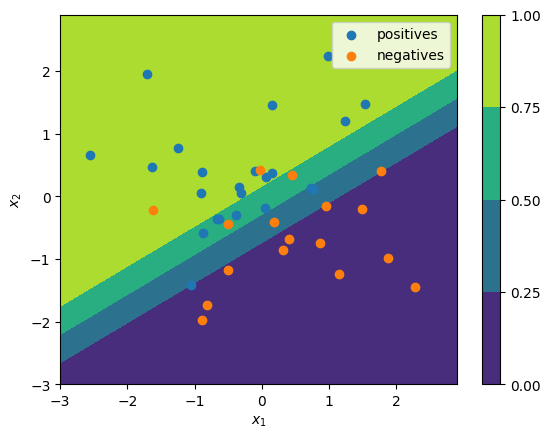

In [17]:
draw(slp, X_train, y_train) # Draw the training results of a single layer perceptron.

<!-- JPN -->
　結果はどうなったであろうか。直線的な等高線が描画されたはずである。このように単層パーセプトロンはロジスティック回帰と同様に**線形モデル**である。

<!-- ENG -->
　What was the result? A linear contour line should have been drawn. As you can see, the single layer perceptron is **a linear model**, just like the logistic regression.

-----

<!-- JPN -->
##### 課題 4

　以下に示す多層パーセプトロンモデルについて、学習を行い、同様に等高線を描き、等高線が直線であるか曲線であるかを答えよ。

<!-- ENG -->
##### Exercise 4

　For the multi layer perceptron model shown below, train it, draw the contour lines in the same way, and answer whether the contour lines are straight or curved.

In [18]:
# Multi Layer Perceptron (MLP)
# Don't forget to put Sigmoid() in the middle
torch.manual_seed(0) # Fix the result

mlp = torch.nn.Sequential(
  torch.nn.Linear(2, 2),   # 2 variables → 2 variables
  torch.nn.Sigmoid(),
  torch.nn.Linear(2, 1),   # 2 variables → 1 variable
)

loss_fn = torch.nn.BCEWithLogitsLoss()
optimizer = torch.optim.SGD(mlp.parameters(), lr=0.1) # Don't forget to change this to mlp.paramters()

In [19]:
###### Run training ######
nEpoch = 250 # Increased the number of epochs
for t in range(nEpoch):
  for data_X, data_Y in dataloader:

    ... # Implement the training code here


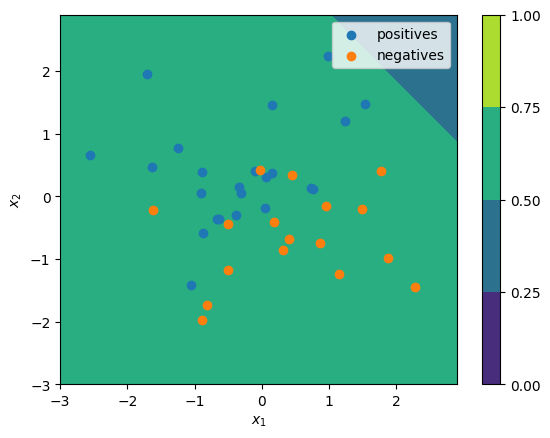

In [20]:
###### Draw contour lines ######
draw(mlp, X_train, y_train) # Draw the training results of a multi layer perceptron

<!-- JPN -->
<font color=orange> **このテキストセルをダブルクリックし答案を記述せよ。** </font>
<!-- この下の行から答案を記述 -->


<!-- ENG -->
<font color=orange> **Double-click this text cell and write your answer.** </font>
<!-- From the next line, write your answer -->

The contour lines for the MLP is curved.

------

<!-- JPN -->
##### 課題 5

　中間層に`Sigmoid()`を入れ忘れてしまった多層パーセプトロンの学習を行った時の等高線を描画せよ。また、この時の等高線は直線的だろうか曲線だろうか。なぜこのようになるのか、考察せよ。

<!-- ENG -->
##### Exercise 5

　Draw the contour lines of a trained multi layer perceptron that was forgotten to be included in `Sigmoid()` in the middle layer. Also, would the contour lines be straight or curved at this time? Discuss why this is the case.

In [21]:
# A multi layer perceptron where input of sigmoid was forgotten
torch.manual_seed(0) # Fix the result

mlp_wo_sigmoid = torch.nn.Sequential(
  torch.nn.Linear(2, 2),   # 2 variables → 2 variables
  torch.nn.Linear(2, 1),   # 2 variables → 1 variable
)

In [22]:
###### RUN training ######
loss_fn = torch.nn.BCEWithLogitsLoss()
optimizer = torch.optim.SGD(mlp_wo_sigmoid.parameters(), lr=0.1)

nEpoch = 250
for t in range(nEpoch):
    for data_X, data_Y in dataloader:
        Y_pred_val = mlp_wo_sigmoid(data_X)
        loss = loss_fn(Y_pred_val, data_Y)

        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

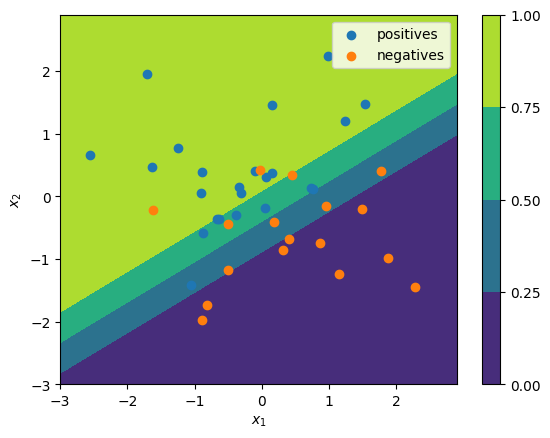

In [23]:
###### Draw contour lines ######
draw(mlp_wo_sigmoid, X_train, y_train) # Draw the training results

<!-- JPN -->
<font color=orange> **このテキストセルをダブルクリックし答案を記述せよ。** </font>
<!-- この下の行から答案を記述 -->


<!-- ENG -->
<font color=orange> **Double-click this text cell and write your answer.** </font>
<!-- From the next line, write your answer -->

The contour lines for this trained MLP without `Sigmoid()` is straight, indicating that the decision boundaries are linear.

The absence of activation functions `Sigmoid()` means that the model is incapable of introducing non-linearities, and thus, the overall behavior becomes linear.


---------------------

<!-- JPN -->
## 4 | `torch.tensor`を利用した単層パーセプトロンの実装

　ここまでで、PyTorchの機能を最大限使って単層パーセプトロンによる学習を行えるようになった。しかし、 `torch.tensor` は何者なのか、確率的勾配降下法 SGD の内部におけるパラメータの更新など、まだまだ触れていないポイントが多数存在する。

　ここでは、 `torch.tensor` による勾配計算を確実におさえ、`torch.nn.Linear` を利用**しない**単層パーセプトロンの実装を発展的な内容として紹介する。

<!-- ENG -->
## 4 | Implementation of a single layer perceptron using `torch.tensor`

　At this point, you can use PyTorch's capabilities to build and train a single layer perceptron. However, there are still many points that we have not talked about, such as what `torch.tensor` is and how to update parameters inside the stochastic gradient descent.

　Here, we will certainly understand the gradient calculation by `torch.tensor`, and discuss the implementation of a single layer perceptron that **does not** use `torch.nn.Linear` as an advanced section.

<!-- JPN -->
### 4.1 | `torch.tensor`の利用

　PyTorchを使う上で、データは `torch.tensor` を使う必要があった。先ほどは `np.array` のようなものである、と記述したが、**`np.array`がさらに賢くなったものが`torch.tensor`**である、と考えると良い。

<!-- ENG -->
### 4.1 | Using `torch.tensor`

　When using PyTorch, we needed to use `torch.tensor` for the data. We have learned that it is like `np.array` earlier, but you can think of **`torch.tensor` as being a smarter version of `np.array`**.

In [24]:
A = torch.tensor([[1,2], [3,4]])
print(A)
print(A.dim())
print(A.shape)
print(A[0,0]) # A single element is also represented by a tensor

tensor([[1, 2],
        [3, 4]])
2
torch.Size([2, 2])
tensor(1)


<!-- JPN -->
　どのような点が `np.array` よりも賢くなっているのだろうか。 `torch.tensor`が最も効果を発揮するのは、**勾配 (gradient) の計算**である。以下のコードを実行して、$y = wx$ の $(x, w) = (1, 2)$ における勾配 $\frac{\partial y}{\partial x}, \frac{\partial y}{\partial w}$を計算してみる。

<!-- ENG -->
　In what ways is it smarter than `np.array`? `torch.tensor` is most effective when **calculating gradients**. Let's run the following code to calculate the gradients $\frac{\partial y}{\partial x}, \frac{\partial y}{\partial w}$ for $y = wx$ at $(x, w) = (1, 2)$.

In [25]:
# Specify the target of the gradient calculation by setting requires_grad=True
# The input value must be a real value
# An error occurs when entering an integer value
x = torch.tensor(1.0, requires_grad=True)
w = torch.tensor(2.0, requires_grad=True)

y = w * x
print(y)

# Calculate the gradients
# Since it is used for backpropagation in neural networks,
# the name of the method is backward, meaning in the opposite direction
y.backward()

# Output gradient for x, w
print("dy/dx (w=2) =", x.grad)
print("dy/dw (x=1) =", w.grad)

tensor(2., grad_fn=<MulBackward0>)
dy/dx (w=2) = tensor(2.)
dy/dw (x=1) = tensor(1.)


<!-- JPN -->
　これだけのコードで勾配の値を求めることができた。もう少し複雑な場合も実行してみる。

<!-- ENG -->
　We were able to find the value of the gradient by using only these codes. I'll try to run a more complex case.

In [26]:
x = torch.tensor(1.0, requires_grad=True)

y = torch.exp(x*x)
y.backward()
print(x.grad)

tensor(5.4366)


<!-- JPN -->
　$y = e^{x^2}$ の時、 $\frac{d y}{d x} = 2xe^{x^2}$ なので、$x=1$ の時の値は $2e = 5.43656...$ である。



<!-- ENG -->
　When $y = e^{x^2}$, $\frac{d y}{d x} = 2xe^{x^2}$, so the value at $x=1$ is $2e = 5.43656...$



<!-- JPN -->
　また、行列計算に対しても、勾配を求めることができる。
以下の例は、行列 $A$ と行列 $B$ の行列積のトレース $tr(AB)$ について、$A$ の勾配を求めている。（これは $\frac{\partial tr(AB)}{\partial A} = B^T$ となる）

<!-- ENG -->
　In addition, the gradient can be obtained for matrix calculation.
The following example finds the gradient of $A$ for the trace $tr(AB)$ of the matrix product of matrix $A$ and matrix $B$, which is $\frac{\partial tr(AB)}{\partial A} = B^T$.

In [27]:
mat_A = torch.tensor([[1.0, 2.0], [3.0, 4.0]], requires_grad=True)
mat_B = torch.tensor([[5.0, 6.0], [7.0, 8.0]])

mat_C = mat_A.mm(mat_B) # mm means calculation the matrix product of matrix A and matrix B.
tr = mat_C.trace()
tr.backward() # Calculate the gradient for the sum of diagonal components
print(mat_A.grad) # mat_A gradient

tensor([[5., 7.],
        [6., 8.]])


<!-- JPN -->
　ちなみに、**`torch.tensor`に対しては、NumPyの関数は使わず、PyTorchの関数を利用しなければならない**。そうしないと、勾配が計算できなくなってしまうからだ（エラー表示としては、`torch.tensor`を`numpy.array`に直してからNumPy関数を使え、という誤解を生みやすいメッセージが表示されるので注意）。

<!-- ENG -->
　By the way, **for `torch.tensor`, you must use the PyTorch function, not the NumPy function**. If you don't, you will not be able to compute the gradient (note that the error message will mislead you to change `torch.tensor` to `numpy.array` and then use the NumPy function).

In [28]:
# Bad example: RuntimeError occurs
import numpy as np
x = torch.tensor(1.0, requires_grad=True)

y = np.exp(x*x)
y.backward()
print(x.grad)

RuntimeError: Can't call numpy() on Tensor that requires grad. Use tensor.detach().numpy() instead.

------

<!-- JPN -->
##### 課題 6


<!-- ENG -->
##### Exercise 6


<!-- JPN -->
　シグモイド関数 $\sigma(a) = \frac{1}{1+e^{-a}}$ について、 以下のコードを埋めることで、$a=1$ の勾配 $\frac{d \sigma(a)}{d a}$ を`torch.tensor`を利用して求めよ。**ただし、`a.sigmoid()`は用いないこと**。



<!-- ENG -->
　For the sigmoid function $\sigma(a) = \frac{1}{1+e^{-a}}$, find the gradient $\frac{d \sigma(a)}{d a}$ at $a=1$ using `torch.tensor` by filling out the code below. **Do not use `a.sigmoid()`**.



In [32]:
# CODE CELL FOR YOUR ANSWER
import torch

a = torch.tensor(1.0, requires_grad=True)
sigma = 1 / (1 + torch.exp(-a))
sigma = sigma * (1 - sigma)
sigma.backward()

print(a.grad)

tensor(-0.0909)


-------

<!-- JPN -->
### 4.2 | `torch.tensor`を利用した単層パーセプトロンの実装（発展）

　それでは、これまで使い方を簡単に見てきた`torch.tensor`を利用して、単層パーセプトロン (Single layer perceptron; SLP) の実装を行ってみる。


<!-- ENG -->
### 4.2 | Implementing a single layer perceptron using `torch.tensor` (Advanced)

　Now, let's try to implement a single layer perceptron using `torch.tensor`, which we have briefly seen how to use.


<!-- JPN -->
#### 4.2.1 | 重み $\boldsymbol{w}$ の定義

　それでは単層パーセプトロンの重みを表現する $\boldsymbol{w}$ を定義しよう（簡単のために、定数項 `bias` は考えない）。今回の場合は<font color="red">2</font>つの値から<font color="blue">1</font>つの値を予測するので、 $\boldsymbol{w}$ は <font color="red">2</font>×<font color="blue">1</font> の行列で表現されるべきだ（行列なので、コードでは大文字の`W`で表現する）。

<!-- ENG -->
#### 4.2.1 | Define the weights $\boldsymbol{w}$

　Let's define $\boldsymbol{w}$ that represents the weights of the single layer perceptron (for simplicity, we will not consider the constant term `bias`). In this case, since we are predicting <font color="blue">one</font> value from <font color="red">two</font> values, $\boldsymbol{w}$ should be represented as a <font color="red">2</font>×<font color="blue">1</font> matrix (since it is a matrix, it is represented by the upper case letter `W` in the code).

In [33]:
torch.manual_seed(0) # Fix the random numbers to get the same execution result every time.

# Define W (initialize with random number)
W = torch.randn(2, 1, dtype=torch.float, requires_grad=True)
print(W)

tensor([[ 1.5410],
        [-0.2934]], requires_grad=True)


<!-- JPN -->
#### 4.2.2 | 学習のコードの作成

　次に、学習のコードを記述する。 `torch.nn.Linear()` を使った実装と同様に、6ステップから構成されるコードを書くが、損失の計算や重みの更新などを自前で準備しているので、より複雑になっている。

<!-- ENG -->
#### 4.2.2 | Create the code for training

　Next, write the training code. Similar to the implementation using `torch.nn.Linear()`, we write a code consisting of 6 steps, but it is more complicated because we prepare the loss calculation and weight update by ourselves.

<!-- JPN -->
1. 以下2.-6.をepoch数だけ繰り返す
2. 以下3.-6.をデータの個数だけ繰り返す
3. あるデータ $x$ について、現在の重み $\boldsymbol{w}$ を使って、$y = 1$ の確率 $\hat{y} = $ $p(y=1|\boldsymbol{x}, \boldsymbol{w})$ を計算する。
4. 実際の $y$ と予測結果を比較し、損失を計算する。
5. 損失を元に、誤差逆伝播法 (backpropagation) で勾配 $\frac{\partial L(\boldsymbol{w})}{\partial \boldsymbol{w}}$を計算する。
6. 学習率 $\eta$ を使って、勾配降下法と同一の更新式 $\boldsymbol{w}^{(t+1)} = \boldsymbol{w}^{(t)} - \eta \frac{\partial L(\boldsymbol{w})}{\partial \boldsymbol{w}}$ で重み $\boldsymbol{w}$ を更新する。


<!-- ENG -->
1. Repeat steps 2-6 below for the number of epochs
2. Repeat steps 3-6 below for the number of data
3. For some data $x$, calculate the probability $\hat{y} = $ $p(y=1|\boldsymbol{x}, \boldsymbol{w})$ at $y = 1$ using the current weights $\boldsymbol{w}$.
4. Compare the actual $y$ with the prediction result and calculate the loss.
5. Based on the loss, calculate the gradient $\frac{\partial L(\boldsymbol{w})}{\partial \boldsymbol{w}}$ using backpropagation.
6. Using the learning rate $\eta$, we update the weights $\boldsymbol{w}$ by the update formula $\boldsymbol{w}^{(t+1)} = \boldsymbol{w}^{(t)} - \eta \frac{\partial L(\boldsymbol{w})}{\partial \boldsymbol{w}}$, which is the same as the steepest gradient descent.


In [34]:
# A function that takes multiple X data as inputs and returns the degree of correctness y_pred_val for each data
# You can convert it to a positive probability by using y_pred_val.sigmoid()
# input: matrix X, matrix W
# output: one dimensional array y_pred_val
def predict_val(X, W):
  y_pred_val = torch.mm(X, W)
  return y_pred_val

# Calculate the cross entropy loss
def binary_cross_entropy(y_pred, y_true):
  ret = 0
  ret -=    y_true  * torch.log(    y_pred) # for y=1
  ret -= (1-y_true) * torch.log(1 - y_pred) # for y=0
  return ret

def train(X, Y, W_original, eta=0.01, epoch = 100):
  torch.manual_seed(0) ## Make sure you get the same result every time

  # A trick that does not rewrite the W itself given as input
  W = W_original.clone().detach().requires_grad_(True)

  # 1. Repeat for the number of epochs
  for t in range(epoch):
    # 2. Repeat for the number of data
    for data_X, data_Y in dataloader: # Extract X and Y simultaneously from dataloader
      # 3. Find p(y=1|x,w)
      y_proba = predict_val(data_X, W).sigmoid()
      # 4. Calculate the loss
      loss = binary_cross_entropy(y_proba, data_Y)
      # 5. Run backpropagation
      # This will calculate the W.grad
      loss.backward()

      # Temporarily suspend (only within the with statement) the gradient calculation.
      with torch.no_grad():
        # 6. Update weights using calculated gradient and learning rate eta
        W -= eta * W.grad
        W.grad.zero_() # Reset the contents of W.grad to 0
  return W

<!-- JPN -->
#### 4.2.3 | 学習の実行と学習結果の確認

　それでは、先ほど作成した `train()` 関数を用いて学習を実行してみるのだが、その前に、未学習の時点での予測正解率を確認してみよう。

　データの予測は、以下のコードで行うことができる。

<!-- ENG -->
#### 4.2.3 | Run the training and check the results

　Now, let's try to train using the `train()` function we created earlier, but before that, let's check the predicted accuracy prior to training.

　Data prediction can be performed with the following code.

In [35]:
count_ok  = 0
count_all = 0

for data_X, data_Y in dataloader:
  y_pred_proba = predict_val(data_X, W).sigmoid() # W is the weight before training
  y_pred = y_pred_proba > 0.5
  result = (y_pred == data_Y)
  count_ok += result.numpy()[0,0] # It becomes true -> 1, false -> 0
print(count_ok, "/", len(Y_torch))

14 / 40


<!-- JPN -->
　資料作成時にテストした際は、ほぼランダム予測な予測精度となっている。

　それでは、気を取り直して学習を行う。これまで書いてきた関数 `train()` を利用することで、簡単に学習が可能なはずである。

<!-- ENG -->
　When creating this material, the prediction accuracy is almost the same as a random prediction.

　Now, let's compose ourselves and start training. By using the function `train()` that we have written so far, it should be easy to train.

In [36]:
W_hat = train(X_torch, Y_torch, W)
print(W_hat)

tensor([[-1.2189],
        [ 1.9061]], requires_grad=True)


<!-- JPN -->
　学習が行われ、`W_hat`が作成された。
これを元に、学習で利用したデータを予測してみる。

<!-- ENG -->
　Training has taken place and `W_hat` has been created.
Based on this, we will try to predict the training data.

In [37]:
count_ok  = 0
count_all = 0

for data_X, data_Y in dataloader:
  y_pred_proba = predict_val(data_X, W_hat).sigmoid()
  y_pred = y_pred_proba > 0.5
  result = y_pred == data_Y
  count_ok += result.numpy()[0,0] # It becomes true -> 1, false -> 0
print(count_ok, "/", len(Y_torch))

31 / 40


<!-- JPN -->
　40個のデータのうち、32個は正しく予測ができるようになった。ちゃんと学習できているようだ。

<!-- ENG -->
　Of the 40 items of data, 32 were able to be predicted correctly. It seems to be training properly.

----

<!-- JPN -->
# 補足資料

<!-- ENG -->
# Supplementary Material

<!-- JPN -->
## ※1 | PyTorchのもうちょっと真面目な勉強資料

　今回の講義では、時間の都合でいろんな知識を飛ばして教えている。
より詳しく知りたい場合は、以下の資料を読んでみると良い
- [公式ドキュメント](https://pytorch.org/docs/stable/index.html)
- チュートリアル系
  - [公式tutorial](https://pytorch.org/tutorials/)
  - [yunjeyによる非公式なtutorial](https://github.com/yunjey/pytorch-tutorial)

　日本語の書籍も存在する（例：「現場で使える！PyTorch開発入門―深層学習モデルの作成とアプリケーションへの実装」翔泳社）が、ニューラルネットワーク（深層学習）はライブラリの仕様などが頻繁に変更されているため、書籍が古いと最新版では存在しない関数を利用している可能性もある。PythonやPyTorchのバージョンには十分注意して、実際にGoogle Colaboratory等で動かしながら学習すると良い。

<!-- ENG -->
## S1 | Some more serious study materials on PyTorch

　In this lecture, we skipped over quite a bit of knowledge due to time constraints.
If you want to know more, you can read the following documents
- [Official documents](https://pytorch.org/docs/stable/index.html)
- Tutorials
  - [Official tutorials](https://pytorch.org/tutorials/)
  - [Unofficial tutorials by yunjey](https://github.com/yunjey/pytorch-tutorial)

　Some Japanese books also exist (e.g., "Useable in the Field! Introduction to PyTorch development - Creation of deep learning models and implementation in applications" Shoeisha Co., Ltd.), but neural networks (deep learning) frequently change library specifications, etc. Therefore, if the book is old, it may use a function that is not supported in the latest version. It is a good idea to pay close attention to the version of Python and PyTorch you are using, and actually run training in Google Colaboratory, etc.